# IS-LM 

# Description and model build-up

For this project, we are using a simple IS-LM model which is defined below. The model consists of the following equations:

1. **Planned expenditures on goods and services:** $$PE = C + I + \bar{G}$$
2. **Private consumption of goods:** $$C = a + b(Y-\bar{T})$$
3. **Equilibrium in the goods market:** $$Y = PE$$
4. **Investment demand:** $$I = c - d r$$
5. **Equilibrium condition in the money market:** $$\frac{\bar{M}}{\bar{P}} = L$$
6. **Real demand for money:** $$L = e Y - f r$$
7. **Production function:** $$Y = g N$$

Where $PE$ is the planned expenditures on goods and services, $C$ is private demand for consumption, $I$ is investment demand, $\bar{G}$ is public demand for consumption, $\bar{T}$ is a lumpsum tax, $r$ is the real interest rate, $\bar{M}$ is the nominaal money supply, $\bar{P}$ is the consumer price index, $L$ is the real demand for money and $N$ is the workforce. The parameters $a, b, c, d, e, f$ and $g$ are all positive. Further, $b$ is less than 1. A bar over a variable means, that the variable is exogenous. 


Imports and set magics:

In [208]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical computing
from scipy import optimize
import sympy as sm
import sympy as sp

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# import class from py file
import Karo
from ISLM_anna import ISLMclass
from scipy.optimize import fsolve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To derive the IS-curve we use the first four equations. By substituting equation (1) into (3) and then combining it with equation (2) and (4) we get the following expression for $Y$:

In [209]:
# Define symbols
Y, r, a, b, c, d, e, f, T, G, M, P, PE, C, I, L = sp.symbols('Y r a b c d e f T G M P PE C I L')

# Equation (1)
PlannedExp = sp.Eq(PE, C + I + G)

# Equation (2)
PrivateCons = sp.Eq(C, a + b * (Y - T))

# Equation (3) - Corrected
EqGoods = sp.Eq(Y, PE)

# Equation (4)
Investment = sp.Eq(I, c - d * r)

# Substitute PE from PlannedExp into EqGoods
EqGoods_substituted = EqGoods.subs(PE, C + I + G)

# Substitute the expression for C from PrivateCons into EqGoods_substituted
EqGoods_final = EqGoods_substituted.subs(C, a + b * (Y - T))

# Substitute I from (4) into EqGoods_final:
EqGoods_finalfinal = EqGoods_final.subs(I, c - d * r)

# Solve the system of equations
solution = sp.solve([EqGoods_finalfinal], (Y, r))
solution

{Y: d*r/(b - 1) + (-G + T*b - a - c)/(b - 1)}

Then we isolate for $r$ as a function of $Y$ and get the IS-curve:

In [210]:
# Expressing the equation for r as a function of Y to get the IS-curve
solution = sp.solve([EqGoods_finalfinal], (r))
solution

{r: (G - T*b + Y*b - Y + a + c)/d}

Next, we apply equations (5) and (6) to derive an expression for the LM-curve, which also is $r$ isolated as a function of $Y$, but for the momey market. First we get the expression for Y:


In [211]:
"""Next, we apply equations (5) and (6) to derive an expression for the LM-curve, which also is r isolated as a function of Y, but for the momey market. First we get the expression for Y"""

# Equation (5)
EqMoney = sp.Eq(M/P, L)

# Equation (6)
dMoney = sp.Eq(L, e*Y - f*r)

# Substituting (5) into (6)
dMoney_substituted = dMoney.subs(L, M/P)

solution1 = sp.solve([dMoney_substituted], (Y, r))
solution1


{Y: M/(P*e) + f*r/e}

Then we isolate for $r$ to derive the LM-curve:

In [212]:
# Now expressing it for r as a function of Y
solution = sp.solve([dMoney_substituted], (r))
solution

{r: (-M + P*Y*e)/(P*f)}

Now we want to derive the equilibrium  expressions for Y and r. We start with r and set IS = LM and solve for r:


In [213]:
# Now we set IS equal to LM and solve to derive the equilibrium. Here we get the equilibrium expression for r:
Equilibrium_r = EqGoods_finalfinal.subs(solution1)

solution2 = sp.solve([Equilibrium_r], (r))
solution2

{r: (-G*P*e - M*b + M + P*T*b*e - P*a*e - P*c*e)/(P*b*f - P*d*e - P*f)}

Then we substitute and solve for Y:


In [214]:
# And here we get the equilibrium for Y:
Equilibrium_Y = EqGoods_finalfinal.subs(solution2)

solution3 = sp.solve([Equilibrium_Y], (Y))
solution3

{Y: (-G*P*f - M*d + P*T*b*f - P*a*f - P*c*f)/(P*b*f - P*d*e - P*f)}

# Analysis: IS-LM model

In the following section we investigate the IS-LM model by applying some shocks to both the IS curve and the LM curve. First we find the equilibrium in the model with some random parameter values. First is an algorithm of how we solved the equilibrium and plot it. The algorithm present our method througout the project. 
We implement some random paramter values to derive an equilibrium and hereby get an value for Y and r. We use the same random parameter values as baseline throughout the project. 

##### Import Libraries and Module:

Import the necessary libraries: numpy for numerical operations, matplotlib.pyplot for plotting, and scipy.optimize.fsolve for finding roots.
Import the ISLMclass from the ISLM_anna module which contains the model's class definition.

##### Initialize the IS-LM Model:

Instantiate an object of ISLMclass with specified parameters. These parameters represent different economic factors such as propensity to consume, government spending, money supply, etc.

##### Define Interest Rate Functions:

Define the IS_r(Y) function which calculates the interest rate r based on the IS curve formula given output level Y.
Define the LM_r(Y) function to compute the interest rate r using the LM curve formula for a given output Y.

##### Generate Output Levels:

Create an array Y_values that represents a range of output levels, spanning from 50 to 4000, uniformly divided into 400 points.

##### Compute Interest Rates for Each Output Level:

Use list comprehensions to compute the interest rates for each output level Y from Y_values using the IS_r and LM_r functions, and store these rates in IS_r_values and LM_r_values respectively.

##### Find Equilibrium Output:

Use the fsolve function to find the output level Y_eq where the difference between the IS and LM interest rates is minimized (ideally zero). Use 500 as the initial guess for this computation.
Calculate the equilibrium interest rates for IS and LM using the found equilibrium output.

##### Plotting:

Initialize a plot with a specified figure size.
Plot the IS curve by plotting Y_values against IS_r_values with a blue line.
Plot the LM curve by plotting Y_values against LM_r_values with a red line.
Mark the equilibrium point on the plot using a green scatter point.
Set the plot title, labels for the x-axis and y-axis, and add a legend.
Enable grid lines for better readability of the plot.
Display the plot.


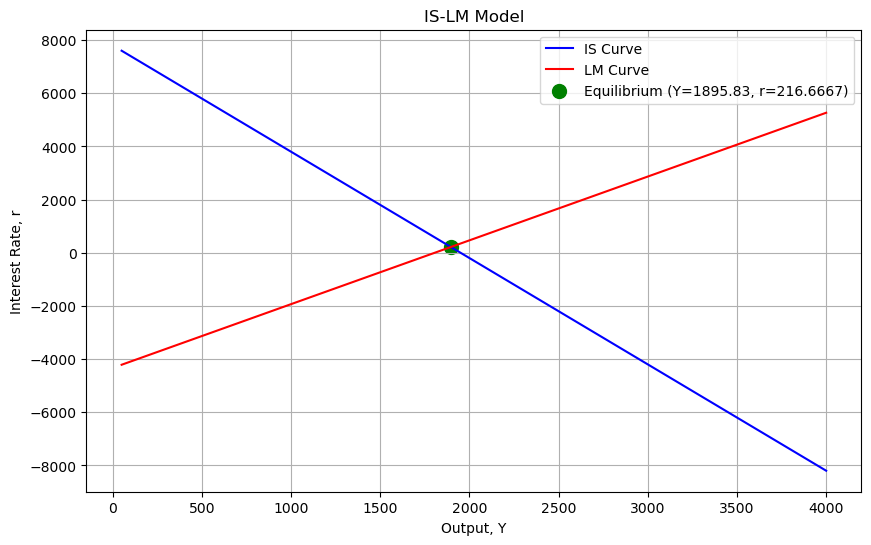

In [220]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ISLM_anna import ISLMclass

# Initialize the model with adjusted parameters for better curve fitting
model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500
)

# Define functions to compute IS and LM interest rates
def IS_r(Y):
    # Adjusting to return r directly
    return (1 / model.par.d) * (model.par.a + model.par.c - model.par.b * model.par.T + model.par.G - (1 - model.par.b) * Y)

def LM_r(Y):
    # Adjusting to return r directly
    return (model.par.e / model.par.f) * Y - (1 / model.par.f) * (model.par.M / model.par.P)

# Generate Y values and compute r for IS and LM curves
Y_values = np.linspace(50, 4000, 400)  # Adjusted range if needed
IS_r_values = [IS_r(Y) for Y in Y_values]
LM_r_values = [LM_r(Y) for Y in Y_values]

# Find equilibrium by minimizing the difference between the IS and LM r values
Y_eq_guess = 500
Y_eq = fsolve(lambda Y: abs(IS_r(Y) - LM_r(Y)), Y_eq_guess)
r_eq_IS = IS_r(Y_eq[0])
r_eq_LM = LM_r(Y_eq[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_values, IS_r_values, label='IS Curve', color='blue')
plt.plot(Y_values, LM_r_values, label='LM Curve', color='red')
plt.scatter(Y_eq, r_eq_IS, color='green', s=100, label=f'Equilibrium (Y={Y_eq[0]:.2f}, r={r_eq_IS:.4f})')
plt.title('IS-LM Model')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()



This model serves as the baseline for the project. We recognize that it produces an unrealistically high interest rate; however, this is merely illustrative, and the values should not be considered representative of realistic conditions.

In the forthcoming section, we'll observe the model's response to a fiscal shock characterized by an uptick in government spending (G). We increase G from G=300 to G=400. 

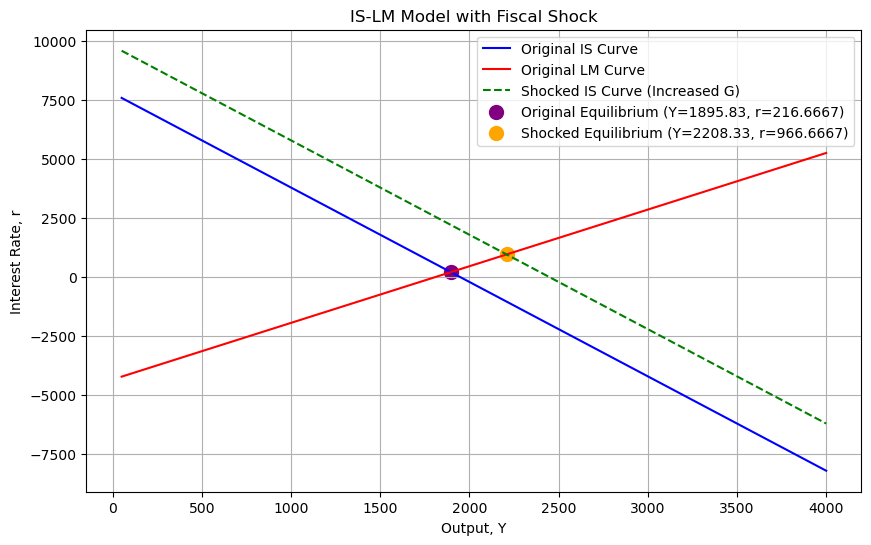

In [216]:

# Initialize the model with original parameters
original_model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500
)

# Initialize the model with a fiscal shock (increase in G)
shocked_model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=400, M=6500, P=3, r=0.04, N=500
)

# Define function to compute IS and LM rates
def compute_rates(model, Y):
    IS_r = (1 / model.par.d) * (model.par.a + model.par.c - model.par.b * model.par.T + model.par.G - (1 - model.par.b) * Y)
    LM_r = (model.par.e / model.par.f) * Y - (1 / model.par.f) * (model.par.M / model.par.P)
    return IS_r, LM_r

# Generate Y values
Y_values = np.linspace(50, 4000, 400)

# Compute rates for original and shocked models
original_IS_r_values, original_LM_r_values = zip(*(compute_rates(original_model, Y) for Y in Y_values))
shocked_IS_r_values, _ = zip(*(compute_rates(shocked_model, Y) for Y in Y_values))

# Find equilibrium for the original model
Y_eq_original = fsolve(lambda Y: abs(compute_rates(original_model, Y)[0] - compute_rates(original_model, Y)[1]), 500)[0]
r_eq_original = compute_rates(original_model, Y_eq_original)[1]

# Find equilibrium for the shocked model
Y_eq_shocked = fsolve(lambda Y: abs(compute_rates(shocked_model, Y)[0] - compute_rates(shocked_model, Y)[1]), 500)[0]
r_eq_shocked = compute_rates(shocked_model, Y_eq_shocked)[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_values, original_IS_r_values, label='Original IS Curve', color='blue')
plt.plot(Y_values, original_LM_r_values, label='Original LM Curve', color='red')
plt.plot(Y_values, shocked_IS_r_values, label='Shocked IS Curve (Increased G)', color='green', linestyle='--')
plt.scatter(Y_eq_original, r_eq_original, color='purple', s=100, label=f'Original Equilibrium (Y={Y_eq_original:.2f}, r={r_eq_original:.4f})')
plt.scatter(Y_eq_shocked, r_eq_shocked, color='orange', s=100, label=f'Shocked Equilibrium (Y={Y_eq_shocked:.2f}, r={r_eq_shocked:.4f})')
plt.title('IS-LM Model with Fiscal Shock')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()


We see that an increase in government spending (increase in G). This gives a higher Y and r value in the new equilibrium. This shift reflects the impact of higher government spending, leading to increased demand and output levels in the economy. Additionally, the rise in the interest rate reflects the adjustment required to balance the increased demand with the available supply of funds, thereby influencing investment and overall economic activity.

In the following section, we'll observe the model's response to a monetary shock characterized by an uptick in Money supply (M).








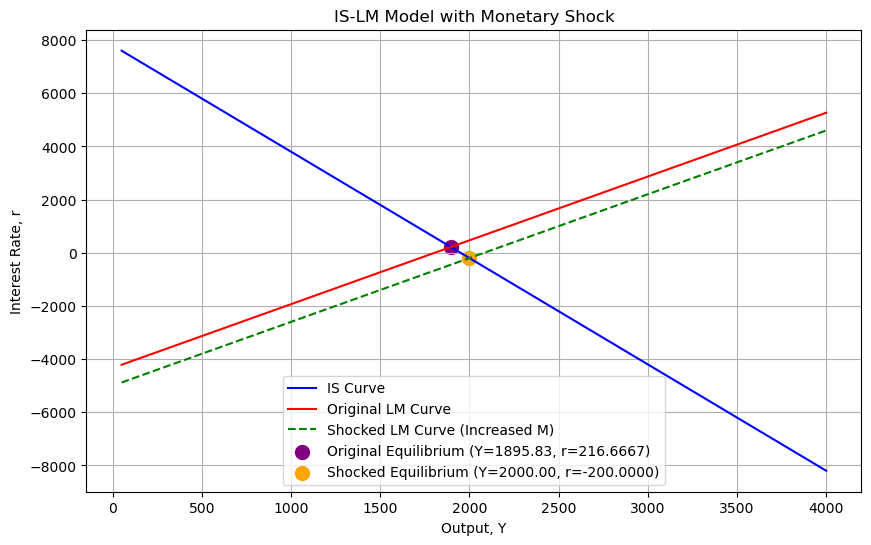

In [217]:

# Initialize the model with original parameters
original_model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500
)

# Initialize the model with an LM shock (increase in M)
shocked_model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=7500, P=3, r=0.04, N=500
)

# Define function to compute IS and LM rates for given Y
def compute_rates(model, Y):
    IS_r = (1 / model.par.d) * (model.par.a + model.par.c - model.par.b * model.par.T + model.par.G - (1 - model.par.b) * Y)
    LM_r = (model.par.e / model.par.f) * Y - (1 / model.par.f) * (model.par.M / model.par.P)
    return IS_r, LM_r

# Generate a range of Y values
Y_values = np.linspace(50, 4000, 400)

# Compute rates for original and shocked models
original_IS_r_values, original_LM_r_values = zip(*(compute_rates(original_model, Y) for Y in Y_values))
_, shocked_LM_r_values = zip(*(compute_rates(shocked_model, Y) for Y in Y_values))

# Find the Y value that achieves the target r in LM curve
Y_eq_original = fsolve(lambda Y: abs(compute_rates(original_model, Y)[0] - compute_rates(original_model, Y)[1]), 500)[0]
r_eq_original = compute_rates(original_model, Y_eq_original)[1]

Y_eq_shocked = fsolve(lambda Y: abs(compute_rates(shocked_model, Y)[0] - compute_rates(shocked_model, Y)[1]), 500)[0]
r_eq_shocked = compute_rates(shocked_model, Y_eq_shocked)[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_values, original_IS_r_values, label='IS Curve', color='blue')
plt.plot(Y_values, original_LM_r_values, label='Original LM Curve', color='red')
plt.plot(Y_values, shocked_LM_r_values, label='Shocked LM Curve (Increased M)', color='green', linestyle='--')
plt.scatter(Y_eq_original, r_eq_original, color='purple', s=100, label=f'Original Equilibrium (Y={Y_eq_original:.2f}, r={r_eq_original:.4f})')
plt.scatter(Y_eq_shocked, r_eq_shocked, color='orange', s=100, label=f'Shocked Equilibrium (Y={Y_eq_shocked:.2f}, r={r_eq_shocked:.4f})')
plt.title('IS-LM Model with Monetary Shock')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()


As demonstrated by the graphs, the downward shift of the LM curve results in higher output (Y) but a lower interest rate (r) in the new equilibrium. This shift reflects the expansionary effect of the increased money supply, which stimulates economic activity and boosts output levels. The decrease in the interest rate corresponds to the greater availability of funds in the economy, encouraging investment and consumption. 

# Further analysis: Extended IS-LM model

In this part of the project we investigate what happens to the economy if we open it, this is done by implementing: foreign interest rate, an exchange rate, import and eksport. We use the same parameter values as in the previous section (without shocks) and give the new parameters some random values. 

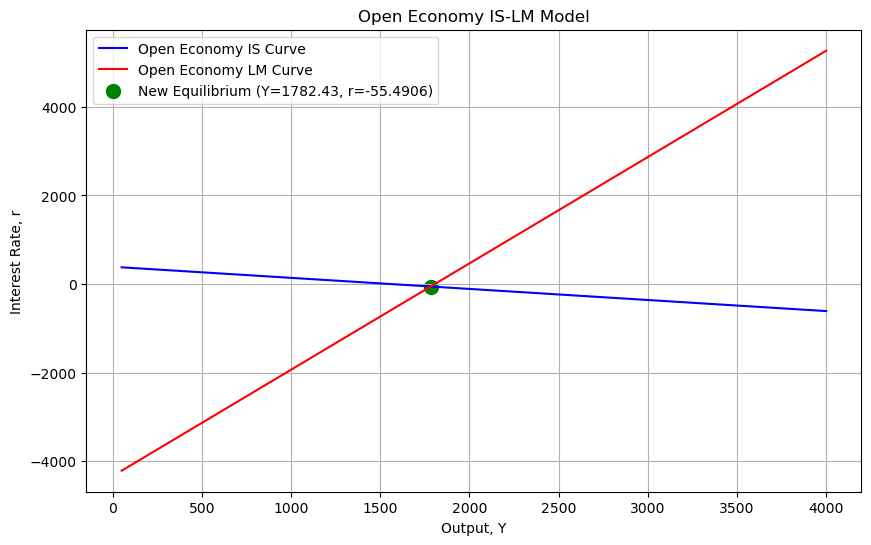

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ISLM_anna import ISLMfclass


# Initialize the model with new parameters for an open economy
model = ISLMfclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500, X=0.1, IM=0.05, e_rate=1.2, i_foreign=0.03
)

# Generate Y values and compute r for the new IS and LM curves
Y_values = np.linspace(50, 4000, 400)
IS_r_values = [model.IS_curve(Y) for Y in Y_values]
LM_r_values = [model.LM_curve(Y) for Y in Y_values]

# Find the new equilibrium for the open economy model
Y_eq_open = fsolve(lambda Y: abs(model.IS_curve(Y) - model.LM_curve(Y)), 500)
r_eq_open_IS = model.IS_curve(Y_eq_open[0])
r_eq_open_LM = model.LM_curve(Y_eq_open[0])

# Plotting the new equilibrium
plt.figure(figsize=(10, 6))
plt.plot(Y_values, IS_r_values, label='Open Economy IS Curve', color='blue')
plt.plot(Y_values, LM_r_values, label='Open Economy LM Curve', color='red')
plt.scatter(Y_eq_open, r_eq_open_IS, color='green', s=100, label=f'New Equilibrium (Y={Y_eq_open[0]:.2f}, r={r_eq_open_IS:.4f})')
plt.title('Open Economy IS-LM Model')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()


This is the baseline equlibrium for the open economy. As we implemented new parameter with random values it will not be possible to compare the equilbrium values from the closed economy with this one. 

In the following part we implement a fiscal shoch to the open economy by increasing government spending (G). We do this so we are able to see the relative change in a fsical shock in an open economy and in a closed economy. 

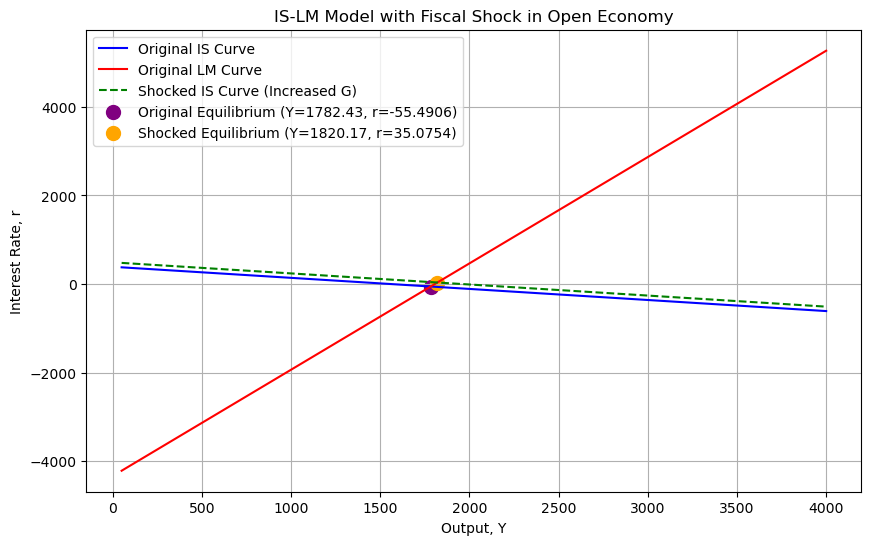

In [219]:

# Initialize the original model
original_model = ISLMfclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500, X=0.1, IM=0.05, e_rate=1.2, i_foreign=0.03
)

# Initialize the model with a shock to government spending G
shocked_model = ISLMfclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=400, M=6500, P=3, r=0.04, N=500, X=0.1, IM=0.05, e_rate=1.2, i_foreign=0.03
)

# Generate Y values
Y_values = np.linspace(50, 4000, 400)

# Compute rates for both original and shocked models
original_IS_r_values = [original_model.IS_curve(Y) for Y in Y_values]
original_LM_r_values = [original_model.LM_curve(Y) for Y in Y_values]
shocked_IS_r_values = [shocked_model.IS_curve(Y) for Y in Y_values]

# Find equilibrium for the original model
Y_eq_original = fsolve(lambda Y: abs(original_model.IS_curve(Y) - original_model.LM_curve(Y)), 500)
r_eq_original_IS = original_model.IS_curve(Y_eq_original[0])

# Find equilibrium for the shocked model
Y_eq_shocked = fsolve(lambda Y: abs(shocked_model.IS_curve(Y) - shocked_model.LM_curve(Y)), 500)
r_eq_shocked_IS = shocked_model.IS_curve(Y_eq_shocked[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_values, original_IS_r_values, label='Original IS Curve', color='blue')
plt.plot(Y_values, original_LM_r_values, label='Original LM Curve', color='red')
plt.plot(Y_values, shocked_IS_r_values, label='Shocked IS Curve (Increased G)', color='green', linestyle='--')
plt.scatter(Y_eq_original, r_eq_original_IS, color='purple', s=100, label=f'Original Equilibrium (Y={Y_eq_original[0]:.2f}, r={r_eq_original_IS:.4f})')
plt.scatter(Y_eq_shocked, r_eq_shocked_IS, color='orange', s=100, label=f'Shocked Equilibrium (Y={Y_eq_shocked[0]:.2f}, r={r_eq_shocked_IS:.4f})')
plt.title('IS-LM Model with Fiscal Shock in Open Economy')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()


In conclusion, within an open economy of the IS-LM model, increasing government spending (G) leads to an upward shift in the IS curve. This shift indicates a rise in both output (Y) and the interest rate (r) in the new equilibrium. The intuition behind this movement lies in the increased demand resulting from a higher government expenditure. As G increases, aggregate demand expands, stimulating production and economic activity. Consequently, the equilibrium output level rises to accommodate the heightened demand. However, the accompanying increase in the interest rate serves as a mechanism to balance the increased demand with the available supply of funds, influencing investment and overall economic dynamics.

We would expect the impact to be smaller in an open economy compared to the closed economy, which we also see by the interest rate and the output. This is because in an open economy, part of the increased government spending can leak out through imports, leading to a smaller multiplier effect on domestic output. Additionally, the interest rate effect may also be dampened in an open economy due to capital mobility, which can mitigate upward pressure on interest rates resulting from increased government borrowing.


# Conclusion

Add concise conclusion. 